In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [2]:
#Prepare Dataframe
dataframe_old = pd.read_csv("pima-indians-diabetes.csv")

#Checking for null values in the dataset
dataframe_old.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
dataframe_old.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(5.069444444444445, 0.5, 'density')

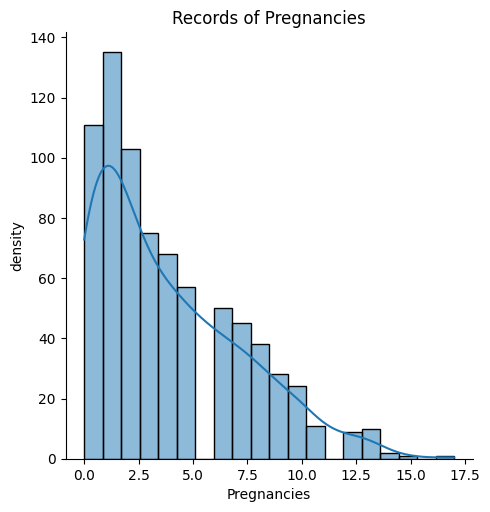

In [4]:
#Visualizing Pregnancies
sns.displot(dataframe_old['Pregnancies'], kde=True, bins=20)

plt.title('Records of Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('density')


Text(5.069444444444445, 0.5, 'density')

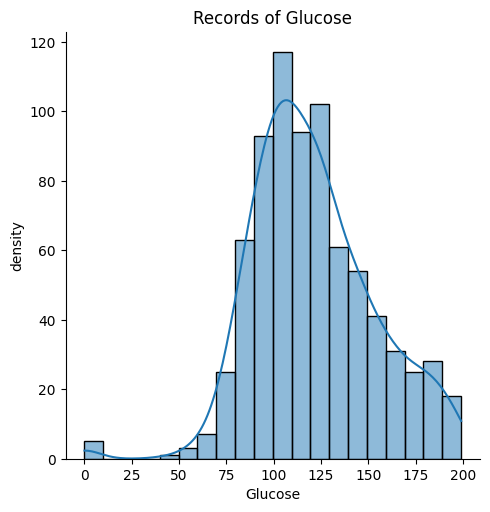

In [5]:
#Visualizing Glucose
sns.displot(dataframe_old['Glucose'], kde=True, bins=20)

plt.title('Records of Glucose')
plt.xlabel('Glucose')
plt.ylabel('density')


Text(5.069444444444445, 0.5, 'density')

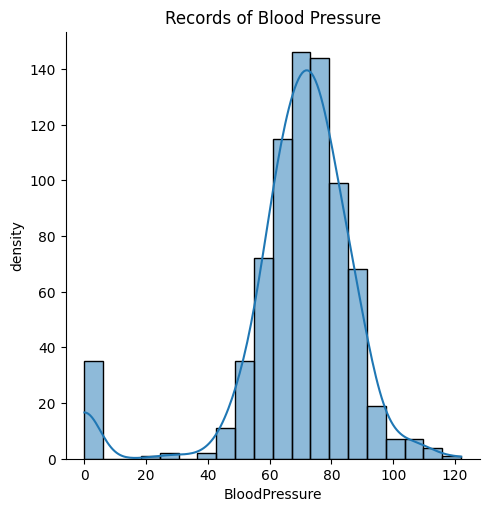

In [6]:
#Visualizing Blood Pressure
sns.displot(dataframe_old['BloodPressure'], kde=True, bins=20)

plt.title('Records of Blood Pressure')
plt.xlabel('BloodPressure')
plt.ylabel('density')

Text(5.069444444444445, 0.5, 'density')

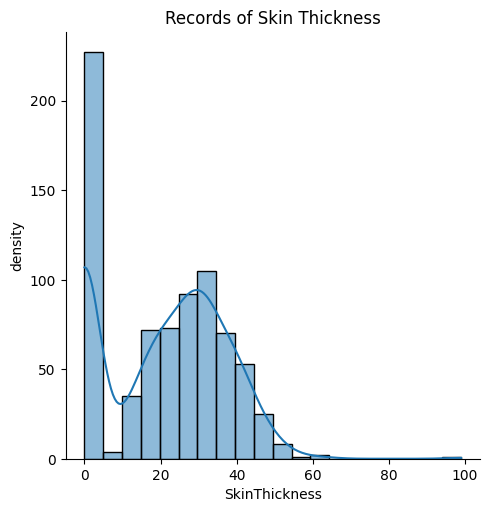

In [7]:
#Visualizing Skin Thickness
sns.displot(dataframe_old['SkinThickness'], kde=True, bins=20)

plt.title('Records of Skin Thickness')
plt.xlabel('SkinThickness')
plt.ylabel('density')

Text(5.069444444444445, 0.5, 'density')

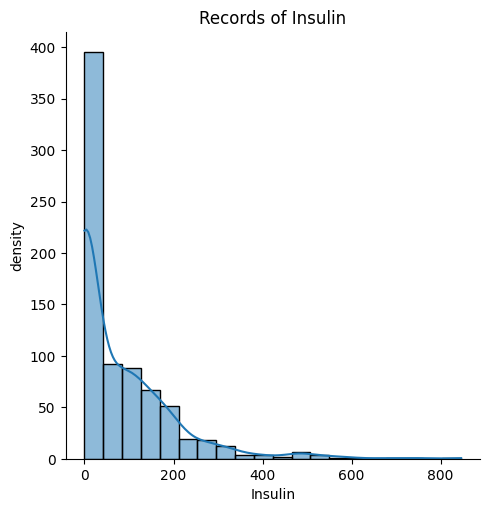

In [8]:
#Visualizing Insulin
sns.displot(dataframe_old['Insulin'], kde=True, bins=20)

plt.title('Records of Insulin')
plt.xlabel('Insulin')
plt.ylabel('density')

Text(5.069444444444445, 0.5, 'density')

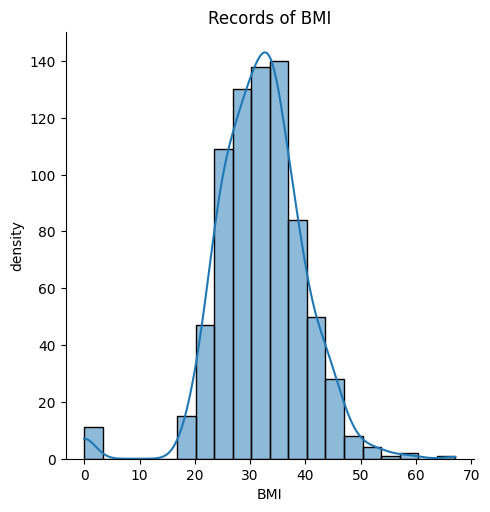

In [9]:
#Visualizing BMI
sns.displot(dataframe_old['BMI'], kde=True, bins=20)

plt.title('Records of BMI')
plt.xlabel('BMI')
plt.ylabel('density')

Text(5.069444444444445, 0.5, 'density')

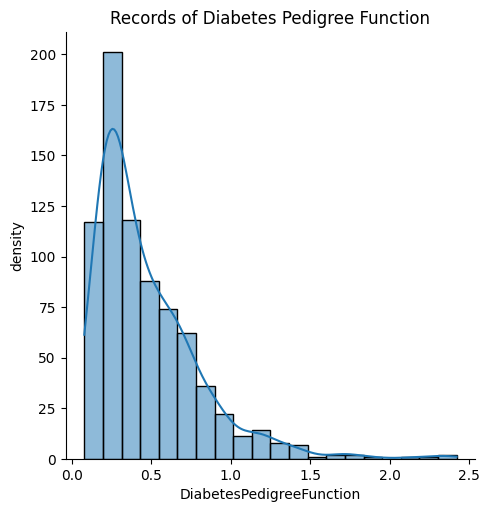

In [10]:
#Visualizing Diabetes Pedigree Function
sns.displot(dataframe_old['DiabetesPedigreeFunction'], kde=True, bins=20)

plt.title('Records of Diabetes Pedigree Function')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('density')

Text(5.069444444444445, 0.5, 'density')

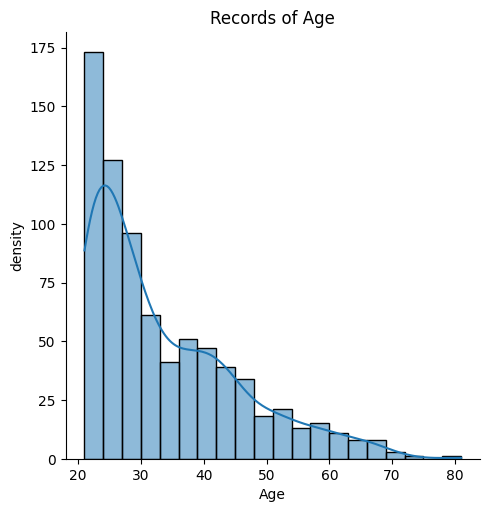

In [11]:
#Visualizing Age
sns.displot(dataframe_old['Age'], kde=True, bins=20)

plt.title('Records of Age')
plt.xlabel('Age')
plt.ylabel('density')

In [12]:
#Check if any dataframe is equals to 0
print("Total BloodPressure == 0: ", dataframe_old[dataframe_old.BloodPressure == 0].shape[0])
print("Total Glucose == 0: ", dataframe_old[dataframe_old.Glucose == 0].shape[0])
print("Total BMI == 0: ", dataframe_old[dataframe_old.BMI == 0].shape[0])
print("Total SkinThickness == 0: ", dataframe_old[dataframe_old.SkinThickness == 0].shape[0])
print("Total Insulin == 0: ", dataframe_old[dataframe_old.Insulin == 0].shape[0])

dataframe_new = dataframe_old[(dataframe_old.BloodPressure != 0) & (dataframe_old.BMI != 0) & (dataframe_old.Glucose != 0)]
print(dataframe_old.shape)
print(dataframe_new.shape)

Total BloodPressure == 0:  35
Total Glucose == 0:  5
Total BMI == 0:  11
Total SkinThickness == 0:  227
Total Insulin == 0:  374
(768, 9)
(724, 9)


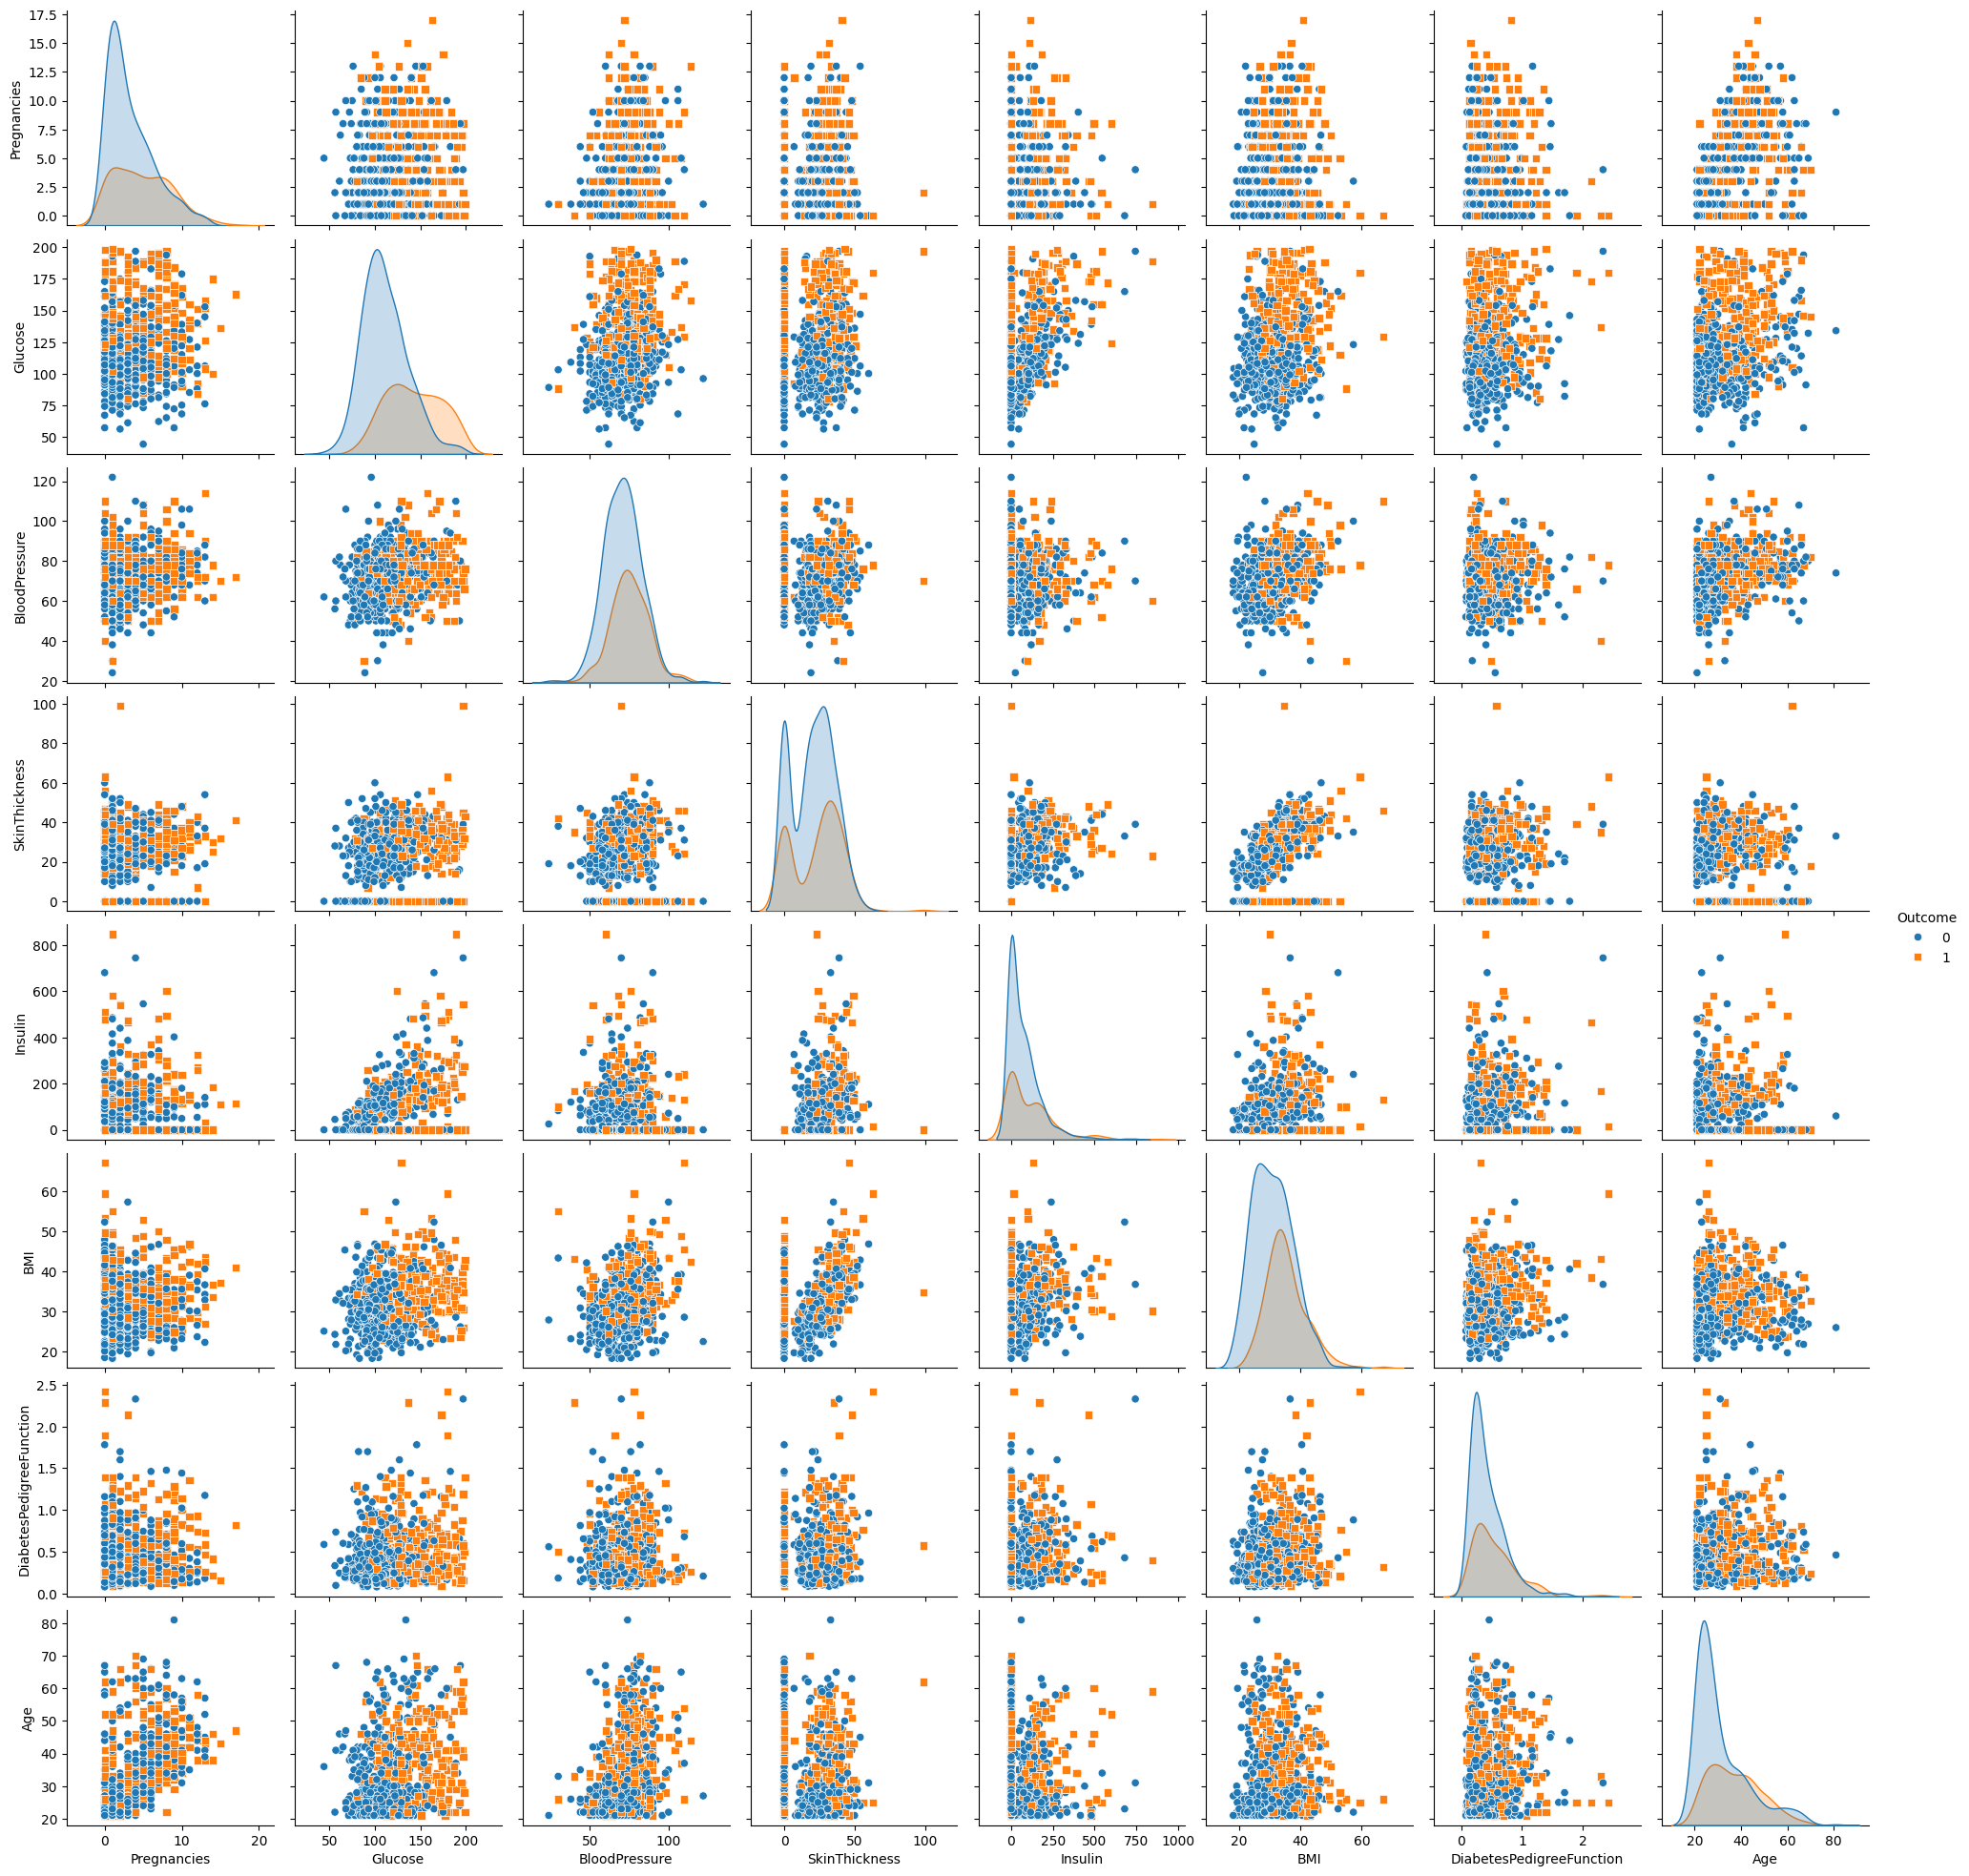

In [13]:
#Print Scatterplot
figure = sns.pairplot(dataframe_new, hue='Outcome', markers=["o", "s"])

In [14]:
#Separate dependent and independent variables
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
X = dataframe_new[features]
y = dataframe_new.Outcome

#Validation method
strat_k_fold = StratifiedKFold(n_splits=5, random_state=5, shuffle=True)

In [15]:
#Using Logistic Regression
logReg_model = LogisticRegression(max_iter=1000)
print("CV for Logistic Regression:")
print("Accuracy: ", cross_val_score(logReg_model, X, y, cv=strat_k_fold, scoring='accuracy').mean())
print("Precision: ", cross_val_score(logReg_model, X, y, cv=strat_k_fold, scoring='precision').mean())
print("Recall: ", cross_val_score(logReg_model, X, y, cv=strat_k_fold, scoring='recall').mean())


CV for Logistic Regression:
Accuracy:  0.7748754789272031
Precision:  0.7296266233766234
Recall:  0.554530612244898


In [16]:
#Logistic Regression with feature selection
logReg_model = LogisticRegression(max_iter=1000)

rfecv = RFECV(estimator=logReg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X, y)

feature_importance = list(zip(features, rfecv.support_))

new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [17]:
# Calculate performance after feature selection 
X_new = dataframe_new[new_features]

print("Before Feature Selection: ")
print("Accuracy: ", cross_val_score(logReg_model, X, y, cv=strat_k_fold, scoring='accuracy').mean())
print("Precision: ", cross_val_score(logReg_model, X, y, cv=strat_k_fold, scoring='precision').mean())
print("Recall: ", cross_val_score(logReg_model, X, y, cv=strat_k_fold, scoring='recall').mean())
print("\n")
print("After Feature Selection: ")
print("Accuracy: ", cross_val_score(logReg_model, X_new, y, cv=strat_k_fold, scoring='accuracy').mean())
print("Precision: ", cross_val_score(logReg_model, X_new, y, cv=strat_k_fold, scoring='precision').mean())
print("Recall: ", cross_val_score(logReg_model, X_new, y, cv=strat_k_fold, scoring='recall').mean())

Before Feature Selection: 
Accuracy:  0.7748754789272031
Precision:  0.7296266233766234
Recall:  0.554530612244898


After Feature Selection: 
Accuracy:  0.7721168582375479
Precision:  0.7204354469060352
Recall:  0.554530612244898


In [18]:
#Print logistic regression parameters
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [19]:
#Hyperparameter Tuning for LR
c_values = list(np.arange(1, 10))

param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=strat_k_fold, scoring='accuracy')
grid.fit(X, y)

print(grid.best_params_)
print(grid.best_estimator_)

{'C': 8, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=8, max_iter=1000, multi_class='ovr', solver='liblinear')


In [20]:
#After hyperparameter tuning
logreg_new = LogisticRegression(C=8, max_iter=1000, multi_class='ovr', solver='liblinear')

print("After tuning the hyperparameters: ")
print("Accuracy: ", cross_val_score(logreg_new, X, y, cv=strat_k_fold, scoring='accuracy').mean())
print("Precision: ", cross_val_score(logreg_new, X, y, cv=strat_k_fold, scoring='precision').mean())
print("Recall: ", cross_val_score(logreg_new, X, y, cv=strat_k_fold, scoring='recall').mean())

After tuning the hyperparameters: 
Accuracy:  0.7762452107279694
Precision:  0.7342054263565891
Recall:  0.5544489795918368


In [21]:
#For GaussianNB
gnb_model = GaussianNB()
print("CV for GaussianNB:")
print("Accuracy: ", cross_val_score(gnb_model, X, y, cv=strat_k_fold, scoring='accuracy').mean())
print("Precision: ", cross_val_score(gnb_model, X, y, cv=strat_k_fold, scoring='precision').mean())
print("Recall: ", cross_val_score(gnb_model, X, y, cv=strat_k_fold, scoring='recall').mean())

CV for GaussianNB:
Accuracy:  0.7582758620689656
Precision:  0.6658300804275498
Recall:  0.6108571428571429


In [22]:
#Print hyperparameters for GaussianNB
GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [23]:
#Hyperparameter tuning for GaussianNB
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=strat_k_fold, n_jobs=-1)
nbModel_grid.fit(X, y)
print(nbModel_grid.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=6.579332246575683e-06)


In [24]:
#Result of performance after tuning
gnb_new = GaussianNB(var_smoothing=6.579332246575683e-06)

print("After tuning the hyperparameters: ")
print("Accuracy: ", cross_val_score(gnb_new, X, y, cv=strat_k_fold, scoring='accuracy').mean())
print("Precision: ", cross_val_score(gnb_new, X, y, cv=strat_k_fold, scoring='precision').mean())
print("Recall: ", cross_val_score(gnb_new, X, y, cv=strat_k_fold, scoring='recall').mean())

After tuning the hyperparameters: 
Accuracy:  0.7624137931034483
Precision:  0.6726302439628308
Recall:  0.6148571428571429
